In [1]:
# pip install geopandas


In [2]:
# pip install pyproj

In [3]:
# pip install rtree

In [4]:
# pip install statsmodels

In [5]:
# pip install fiona

In [6]:
# pip install matplotlib

In [7]:
# pip install scikit-learn

In [8]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from sklearn.neighbors import BallTree
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# This code uses GeoPandas to read a shapefile containing Boston neighborhood boundaries and creates a plot where each neighborhood is colored based on its name. This visualization helps in understanding the geographical distribution of neighborhoods in Boston, facilitating property grouping based on their location in whichever neighborhood.

<Axes: >

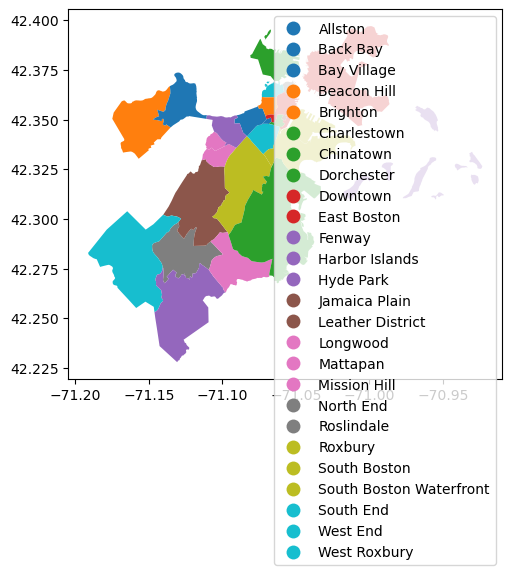

In [9]:
neighborhoods = gpd.read_file("Boston_Neighborhoods.shp")
neighborhoods.plot(column='Name', cmap=None, legend=True)

# 'prop23' datset provides a comprehensive and detailed overview of individual parcels in Boston. The information on property values, land use, building characteristics, and ownership details enables analysts to study trends in property assessments, identify patterns in land use, and assess the impact of factors like the year built and remodeling on property values. Additionally, details about heating systems, amenities, and parking spaces contribute valuable insights into the residential features of the properties, facilitating a thorough analysis of Boston's real estate landscape and aiding in informed decision-making for various stakeholders, including policymakers, researchers, and real estate professionals.

In [10]:
prop23 = pd.read_csv("fy2023-property-assessment-data.csv")
display(prop23.shape)
prop23.info()
prop23

(180627, 60)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180627 entries, 0 to 180626
Data columns (total 60 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PID                 180627 non-null  int64  
 1   CM_ID               91160 non-null   float64
 2   GIS_ID              180627 non-null  int64  
 3   ST_NUM              171096 non-null  float64
 4   ST_NAME             180627 non-null  object 
 5   UNIT_NUM            80672 non-null   object 
 6   CITY                180622 non-null  object 
 7   ZIP_CODE            180624 non-null  float64
 8   BLDG_SEQ            180626 non-null  float64
 9   NUM_BLDGS           180627 non-null  int64  
 10  LUC                 180627 non-null  int64  
 11  LU                  180627 non-null  object 
 12  LU_DESC             180627 non-null  object 
 13  BLDG_TYPE           178101 non-null  object 
 14  OWN_OCC             180627 non-null  object 
 15  OWNER               180627 non-nul

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,...,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,100001000,NaN,100001000,104.0,PUTNAM ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,3.0,A - Average,NaN
1,100002000,NaN,100002000,197.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0.0,NaN,0.0,A - Average,NaN
2,100003000,NaN,100003000,199.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,0.0,NaN,0.0,A - Average,NaN
3,100004000,NaN,100004000,201.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,0.0,A - Average,NaN
4,100005000,NaN,100005000,203.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,0.0,NaN,0.0,A - Average,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180622,2205666000,NaN,2205666000,NaN,KNOWLES ST,NaN,BRIGHTON,2135.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
180623,2205667000,NaN,2205667000,NaN,Lake ST,NaN,BRIGHTON,2135.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
180624,2205668000,NaN,2205668000,4.0,Lake ST,NaN,BRIGHTON,2135.0,1.0,1,...,M - Modern,M - Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,2.0,A - Average,NaN
180625,2205669000,NaN,2205669000,2193.0,COMMONWEALTH AV,NaN,BRIGHTON,2135.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


# The dataset 'padl' contains detailed information about properties in the City of Boston from 2001 to 2021. It includes data such as PID, street details, zip codes, assessed values, land use types, and geographical coordinates (lat and long). The dataset is structured with identifying characteristics, property and building characteristics, and geographical information. The variables cover aspects like property ownership, valuation changes over time, and geographical details.

In [11]:
padl = pd.read_csv("PAD.Long.2021.csv")
display(padl.shape)
padl.info()
padl

(179392, 150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179392 entries, 0 to 179391
Columns: 150 entries, PID to CT_ID_10
dtypes: float64(79), int64(2), object(69)
memory usage: 205.3+ MB


,PID,CM_ID,ST_NUM,ST_NAME,ST_NAME_SUF,ZIPCODE,FY2000.LU,FY2000.AV,FY2000.RESEX,LU2000FourCat,...,RecoveryDiffAV,RecoveryPercChangeAV,X,Y,GIS_ID,Land_Parcel_ID,TLID,Blk_ID_10,BG_ID_10,CT_ID_10
0,1000000000,NaN,136,ST,ST,2130.0,R3,138300.0,Y,Res,...,NaN,NaN,-71.114730,42.321361,1002000000,1.002000e+09,85699076.0,2.502512e+14,2.502512e+11,2.502512e+10
1,1000001005,NaN,NaN,SMITH ST,ST,2120.0,E,545000.0,N,Exem,...,4868000.0,1.263890,-71.098228,42.333945,1000001005,1.000001e+09,640494552.0,2.502508e+14,2.502508e+11,2.502508e+10
2,1000001015,NaN,NaN,SMITH ST,ST,2120.0,E,520500.0,N,Exem,...,513200.0,0.438558,-71.099544,42.334426,1000001015,1.000001e+09,640494548.0,2.502508e+14,2.502508e+11,2.502508e+10
3,1000001020,NaN,34 46,ST ALPHONSUS ST,ST,2120.0,E,776500.0,N,Exem,...,7439000.0,0.790500,-71.099155,42.335053,1000001020,1.000001e+09,85698841.0,2.502508e+14,2.502508e+11,2.502508e+10
4,1000001021,NaN,34 46,ST ALPHONSUS ST,ST,2120.0,NaN,NaN,NaN,NaN,...,200.0,0.400000,-71.099155,42.335053,1000001021,1.000001e+09,85698841.0,2.502508e+14,2.502508e+11,2.502508e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179387,1200354020,NaN,NaN,NaN,ST,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-71.066710,42.342070,105937000,1.059370e+08,NaN,2.502506e+14,2.502506e+11,2.502506e+10
179388,1400193002,NaN,NaN,NaN,AV,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-71.059520,42.355740,304850000,3.048500e+08,85730539.0,2.502506e+14,2.502506e+11,2.502506e+10
179389,401461020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-71.027670,42.338090,600620000,6.006200e+08,85713282.0,2.502509e+14,2.502509e+11,2.502509e+10
179390,500815229,NaN,NaN,NaN,ST,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-71.036280,42.331610,1812152050,1.812152e+09,637177254.0,2.502507e+14,2.502507e+11,2.502507e+10


In [12]:
# https://data.boston.gov/dataset/vision-zero-fatality-records

In [13]:
# https://bluebikes.com/system-data

In [14]:
# https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system

In [15]:
columns_to_keep = ["PID", "ST_NUM", "ST_NAME", "CITY", "ZIP_CODE", "RES_FLOOR", "GROSS_AREA", "LIVING_AREA", "LAND_VALUE", "BLDG_VALUE", "TOTAL_VALUE"]
prop23 = prop23[columns_to_keep]
prop23

,PID,ST_NUM,ST_NAME,CITY,ZIP_CODE,RES_FLOOR,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE
0,100001000,104.0,PUTNAM ST,EAST BOSTON,2128.0,3.0,3353.0,2202.0,195700,588500,784200
1,100002000,197.0,Lexington ST,EAST BOSTON,2128.0,3.0,3299.0,2307.0,196500,615300,811800
2,100003000,199.0,Lexington ST,EAST BOSTON,2128.0,3.0,3392.0,2268.0,197100,599200,796300
3,100004000,201.0,Lexington ST,EAST BOSTON,2128.0,3.0,3108.0,2028.0,197700,530200,727900
4,100005000,203.0,Lexington ST,EAST BOSTON,2128.0,3.0,3700.0,2546.0,225700,569100,794800
...,...,...,...,...,...,...,...,...,...,...,...
180622,2205666000,NaN,KNOWLES ST,BRIGHTON,2135.0,NaN,NaN,NaN,240500,0,240500
180623,2205667000,NaN,Lake ST,BRIGHTON,2135.0,NaN,NaN,NaN,71400,0,71400
180624,2205668000,4.0,Lake ST,BRIGHTON,2135.0,2.5,4291.0,2834.4,464400,850500,1314900
180625,2205669000,2193.0,COMMONWEALTH AV,BRIGHTON,2135.0,NaN,14520.0,7260.0,990900,1478400,2478800


In [16]:
columns_to_keep = ['PID','ZIPCODE','FY2021.AV','DiffAV2021','PercChangeAV2021','RecoveryDiffAV','RecoveryPercChangeAV','X','Y']
padl = padl[columns_to_keep]
padl

,PID,ZIPCODE,FY2021.AV,DiffAV2021,PercChangeAV2021,RecoveryDiffAV,RecoveryPercChangeAV,X,Y
0,1000000000,2130.0,NaN,NaN,NaN,NaN,NaN,-71.114730,42.321361
1,1000001005,2120.0,15924300.0,-258000.0,-0.015943,4868000.0,1.263890,-71.098228,42.333945
2,1000001015,2120.0,1912200.0,0.0,0.000000,513200.0,0.438558,-71.099544,42.334426
3,1000001020,2120.0,2517534.0,-1037.0,-0.000412,7439000.0,0.790500,-71.099155,42.335053
4,1000001021,2120.0,200.0,0.0,0.000000,200.0,0.400000,-71.099155,42.335053
...,...,...,...,...,...,...,...,...,...
179387,1200354020,NaN,NaN,NaN,NaN,NaN,NaN,-71.066710,42.342070
179388,1400193002,NaN,NaN,NaN,NaN,NaN,NaN,-71.059520,42.355740
179389,401461020,NaN,NaN,NaN,NaN,NaN,NaN,-71.027670,42.338090
179390,500815229,NaN,NaN,NaN,NaN,NaN,NaN,-71.036280,42.331610


# This code is counting how many times each unique property identification number (PID) appears in the dataset. It then filters and identifies PIDs that occur more than once, prints those repeated PIDs along with their counts. This helps to identify any duplicates in the property data.

In [17]:
pid_counts1 = prop23['PID'].value_counts()

# Filter for values that are repeated more than once
repeated_pids1 = pid_counts1[pid_counts1 > 1]

# Print the values and their counts
print("Repeated PIDs and their counts:")
for pid, count in repeated_pids1.items():
    print(f"PID: {pid}, Count: {count}")

# Print the total number of unique PIDs
print("\nTotal number of unique PIDs:", len(pid_counts1))

Repeated PIDs and their counts:
PID: 1700511000, Count: 4
PID: 1000447000, Count: 3
PID: 2003590001, Count: 3
PID: 1700571000, Count: 3
PID: 1900604000, Count: 3
PID: 2205424000, Count: 3
PID: 1804396000, Count: 3
PID: 1703802000, Count: 2
PID: 1302491000, Count: 2
PID: 101906000, Count: 2
PID: 1901687000, Count: 2
PID: 1810022000, Count: 2
PID: 200780000, Count: 2
PID: 1809393000, Count: 2
PID: 106599000, Count: 2
PID: 1904640000, Count: 2
PID: 1805346000, Count: 2
PID: 601929000, Count: 2
PID: 1603955000, Count: 2
PID: 1801358000, Count: 2
PID: 700161000, Count: 2
PID: 2201216000, Count: 2
PID: 102875000, Count: 2
PID: 1812404000, Count: 2
PID: 1102568000, Count: 2
PID: 1901459000, Count: 2
PID: 100761000, Count: 2
PID: 1804460000, Count: 2
PID: 2204080000, Count: 2
PID: 1402008000, Count: 2
PID: 106016000, Count: 2
PID: 803055000, Count: 2
PID: 1405006000, Count: 2
PID: 1102864000, Count: 2
PID: 203389006, Count: 2
PID: 2005275000, Count: 2
PID: 1001066000, Count: 2
PID: 101972000, 

In [18]:
prop23 = prop23.drop_duplicates(subset='PID', keep='first')

print("Shape of DataFrame with unique PIDs:", prop23.shape)

Shape of DataFrame with unique PIDs: (180448, 11)


In [19]:
pid_counts2 = padl['PID'].value_counts()

# Filter for values that are repeated more than once
repeated_pids2 = pid_counts2[pid_counts2 > 1]

# Print the values and their counts
print("Repeated PIDs and their counts:")
for pid, count in repeated_pids2.items():
    print(f"PID: {pid}, Count: {count}")

# Print the total number of unique PIDs
print("\nTotal number of unique PIDs:", len(pid_counts2))

Repeated PIDs and their counts:
PID: 1700000000, Count: 4
PID: 1201000000, Count: 4
PID: 1100000000, Count: 3
PID: 1600000000, Count: 3
PID: 1400000000, Count: 3
PID: 2200000000, Count: 3
PID: 1302000000, Count: 3
PID: 1503000000, Count: 3
PID: 1900000000, Count: 3
PID: 1800000000, Count: 3
PID: 502000000, Count: 3
PID: 501000000, Count: 3
PID: 306000000, Count: 3
PID: 2000000000, Count: 3
PID: 1300000000, Count: 2
PID: 902000000, Count: 2
PID: 2010000000, Count: 2
PID: 2100000000, Count: 2
PID: 1810000000, Count: 2
PID: 1200000000, Count: 2
PID: 203000000, Count: 2
PID: 603000000, Count: 2
PID: 1500000000, Count: 2

Total number of unique PIDs: 179353


In [20]:
padl = padl.drop_duplicates(subset='PID', keep='first')

print("Shape of DataFrame with unique PIDs:", padl.shape)

Shape of DataFrame with unique PIDs: (179353, 9)


# Merging both datasets

In [21]:
merged_df = pd.merge(padl, prop23[['PID', 'RES_FLOOR', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE', 'BLDG_VALUE', 'TOTAL_VALUE']], on='PID', how='left')
merged_df.columns = merged_df.columns.str.replace('_x', '').str.replace('_y', '')
merged_df

,PID,ZIPCODE,FY2021.AV,DiffAV2021,PercChangeAV2021,RecoveryDiffAV,RecoveryPercChangeAV,X,Y,RES_FLOOR,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE
0,1000000000,2130.0,NaN,NaN,NaN,NaN,NaN,-71.114730,42.321361,NaN,NaN,NaN,NaN,NaN,NaN
1,1000001005,2120.0,15924300.0,-258000.0,-0.015943,4868000.0,1.263890,-71.098228,42.333945,NaN,107632.0,75863.0,4544800.0,13790100.0,18478200.0
2,1000001015,2120.0,1912200.0,0.0,0.000000,513200.0,0.438558,-71.099544,42.334426,NaN,NaN,NaN,2104600.0,200.0,2104800.0
3,1000001020,2120.0,2517534.0,-1037.0,-0.000412,7439000.0,0.790500,-71.099155,42.335053,NaN,110796.0,83097.0,2225134.0,833374.0,3107519.0
4,1000001021,2120.0,200.0,0.0,0.000000,200.0,0.400000,-71.099155,42.335053,NaN,NaN,NaN,0.0,200.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179348,1200354020,NaN,NaN,NaN,NaN,NaN,NaN,-71.066710,42.342070,NaN,NaN,NaN,NaN,NaN,NaN
179349,1400193002,NaN,NaN,NaN,NaN,NaN,NaN,-71.059520,42.355740,1.0,1302.0,1302.0,0.0,430500.0,430500.0
179350,401461020,NaN,NaN,NaN,NaN,NaN,NaN,-71.027670,42.338090,NaN,NaN,NaN,NaN,NaN,NaN
179351,500815229,NaN,NaN,NaN,NaN,NaN,NaN,-71.036280,42.331610,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
columns_to_add = ['RES_FLOOR', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE', 'BLDG_VALUE', 'TOTAL_VALUE']
padl[columns_to_add] = merged_df[['RES_FLOOR', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE', 'BLDG_VALUE', 'TOTAL_VALUE']]
padl

/var/folders/ly/3ktmx9r518bgzqtk_9ptvvvc0000gn/T/ipykernel_40639/1604721690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  padl[columns_to_add] = merged_df[['RES_FLOOR', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE', 'BLDG_VALUE', 'TOTAL_VALUE']]
/var/folders/ly/3ktmx9r518bgzqtk_9ptvvvc0000gn/T/ipykernel_40639/1604721690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  padl[columns_to_add] = merged_df[['RES_FLOOR', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE', 'BLDG_VALUE', 'TOTAL_VALUE']]
/var/folders/ly/

,PID,ZIPCODE,FY2021.AV,DiffAV2021,PercChangeAV2021,RecoveryDiffAV,RecoveryPercChangeAV,X,Y,RES_FLOOR,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE
0,1000000000,2130.0,NaN,NaN,NaN,NaN,NaN,-71.114730,42.321361,NaN,NaN,NaN,NaN,NaN,NaN
1,1000001005,2120.0,15924300.0,-258000.0,-0.015943,4868000.0,1.263890,-71.098228,42.333945,NaN,107632.0,75863.0,4544800.0,13790100.0,18478200.0
2,1000001015,2120.0,1912200.0,0.0,0.000000,513200.0,0.438558,-71.099544,42.334426,NaN,NaN,NaN,2104600.0,200.0,2104800.0
3,1000001020,2120.0,2517534.0,-1037.0,-0.000412,7439000.0,0.790500,-71.099155,42.335053,NaN,110796.0,83097.0,2225134.0,833374.0,3107519.0
4,1000001021,2120.0,200.0,0.0,0.000000,200.0,0.400000,-71.099155,42.335053,NaN,NaN,NaN,0.0,200.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179387,1200354020,NaN,NaN,NaN,NaN,NaN,NaN,-71.066710,42.342070,NaN,NaN,NaN,NaN,NaN,NaN
179388,1400193002,NaN,NaN,NaN,NaN,NaN,NaN,-71.059520,42.355740,NaN,NaN,NaN,NaN,NaN,NaN
179389,401461020,NaN,NaN,NaN,NaN,NaN,NaN,-71.027670,42.338090,NaN,NaN,NaN,NaN,NaN,NaN
179390,500815229,NaN,NaN,NaN,NaN,NaN,NaN,-71.036280,42.331610,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
columns_to_check = ['ZIPCODE', 'FY2021.AV', 'DiffAV2021', 'PercChangeAV2021', 'RecoveryDiffAV', 'RecoveryPercChangeAV', 'RES_FLOOR', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE', 'BLDG_VALUE', 'TOTAL_VALUE']

# Check if all specified columns have NaN values for each row
nan_rows = padl[columns_to_check].isna().all(axis=1)

# Count the number of rows where all specified columns have NaN values
count_nan_rows = nan_rows.sum()

print(f'The number of observations with NaN in all specified columns: {count_nan_rows}') 

The number of observations with NaN in all specified columns: 16


In [24]:
missing_values = padl.isna().sum()

inverted_missing_values = missing_values.to_frame().T
inverted_missing_values.reset_index(drop=True, inplace=True)

counts = padl.count()
transposed_counts = counts.to_frame().T

percentage_missing_values = (inverted_missing_values.iloc[0] / transposed_counts.iloc[0]) * 100

# percentage of missing values
inverted_missing_values.loc[1] = percentage_missing_values
inverted_missing_values

,PID,ZIPCODE,FY2021.AV,DiffAV2021,PercChangeAV2021,RecoveryDiffAV,RecoveryPercChangeAV,X,Y,RES_FLOOR,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE
0,0.0,96.000000,12516.000000,14978.000000,14978.000000,29569.000000,29569.000000,3.000000,3.000000,35851.000000,37032.000000,37320.000000,3069.000000,3069.000000,3069.000000
1,0.0,0.053554,7.501933,9.112091,9.112091,19.741094,19.741094,0.001673,0.001673,24.982927,26.020053,26.275584,1.740941,1.740941,1.740941


In [25]:
# Calculate correlation matrix
correlation_matrix = padl.corr()

# Extract the correlation coefficients related to the target variable
target_correlation = correlation_matrix['RES_FLOOR'].abs()

# Set a correlation threshold (you can adjust this based on your criteria)
correlation_threshold = 0.2

# Select features with correlation above the threshold
important_features = target_correlation[target_correlation > correlation_threshold].index

# Create a new DataFrame with only the important features
padl_selected_features = padl[important_features]

# Display the selected features or use them in further analysis
padl_selected_features

,RES_FLOOR,GROSS_AREA,LIVING_AREA,LAND_VALUE
0,NaN,NaN,NaN,NaN
1,NaN,107632.0,75863.0,4544800.0
2,NaN,NaN,NaN,2104600.0
3,NaN,110796.0,83097.0,2225134.0
4,NaN,NaN,NaN,0.0
...,...,...,...,...
179387,NaN,NaN,NaN,NaN
179388,NaN,NaN,NaN,NaN
179389,NaN,NaN,NaN,NaN
179390,NaN,NaN,NaN,NaN


In [26]:
missing_values = padl.isna().sum()

inverted_missing_values = missing_values.to_frame().T
inverted_missing_values.reset_index(drop=True, inplace=True)

counts = padl.count()
transposed_counts = counts.to_frame().T

percentage_missing_values = (inverted_missing_values.iloc[0] / transposed_counts.iloc[0]) * 100

# percentage of missing values
inverted_missing_values.loc[1] = percentage_missing_values
inverted_missing_values

,PID,ZIPCODE,FY2021.AV,DiffAV2021,PercChangeAV2021,RecoveryDiffAV,RecoveryPercChangeAV,X,Y,RES_FLOOR,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE
0,0.0,96.000000,12516.000000,14978.000000,14978.000000,29569.000000,29569.000000,3.000000,3.000000,35851.000000,37032.000000,37320.000000,3069.000000,3069.000000,3069.000000
1,0.0,0.053554,7.501933,9.112091,9.112091,19.741094,19.741094,0.001673,0.001673,24.982927,26.020053,26.275584,1.740941,1.740941,1.740941


In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Columns to impute
columns_to_impute = ['RES_FLOOR', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE', 'BLDG_VALUE', 'TOTAL_VALUE']

# Initialize IterativeImputer
imputer = IterativeImputer(random_state=0)

# Fit and transform the DataFrame
padl[columns_to_impute] = imputer.fit_transform(padl[columns_to_impute])
padl

/var/folders/ly/3ktmx9r518bgzqtk_9ptvvvc0000gn/T/ipykernel_40639/726134357.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  padl[columns_to_impute] = imputer.fit_transform(padl[columns_to_impute])


,PID,ZIPCODE,FY2021.AV,DiffAV2021,PercChangeAV2021,RecoveryDiffAV,RecoveryPercChangeAV,X,Y,RES_FLOOR,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE
0,1000000000,2130.0,NaN,NaN,NaN,NaN,NaN,-71.114730,42.321361,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06
1,1000001005,2120.0,15924300.0,-258000.0,-0.015943,4868000.0,1.263890,-71.098228,42.333945,6.713187,107632.000000,75863.00000,4.544800e+06,1.379010e+07,1.847820e+07
2,1000001015,2120.0,1912200.0,0.0,0.000000,513200.0,0.438558,-71.099544,42.334426,2.950962,5580.521630,4933.91416,2.104600e+06,2.000000e+02,2.104800e+06
3,1000001020,2120.0,2517534.0,-1037.0,-0.000412,7439000.0,0.790500,-71.099155,42.335053,7.097618,110796.000000,83097.00000,2.225134e+06,8.333740e+05,3.107519e+06
4,1000001021,2120.0,200.0,0.0,0.000000,200.0,0.400000,-71.099155,42.335053,1.986381,5483.048368,4458.62546,0.000000e+00,2.000000e+02,2.000000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179387,1200354020,NaN,NaN,NaN,NaN,NaN,NaN,-71.066710,42.342070,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06
179388,1400193002,NaN,NaN,NaN,NaN,NaN,NaN,-71.059520,42.355740,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06
179389,401461020,NaN,NaN,NaN,NaN,NaN,NaN,-71.027670,42.338090,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06
179390,500815229,NaN,NaN,NaN,NaN,NaN,NaN,-71.036280,42.331610,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06


In [28]:
# Select relevant columns for imputation
columns_to_impute = ['ZIPCODE','FY2021.AV', 'DiffAV2021', 'PercChangeAV2021', 'RecoveryDiffAV', 'RecoveryPercChangeAV', 'RES_FLOOR', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE', 'BLDG_VALUE', 'TOTAL_VALUE']
impute_data = padl[columns_to_impute]

# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(impute_data)
padl[columns_to_impute] = imputed_data

# Display the DataFrame after imputation
padl

KeyboardInterrupt: 

In [29]:
missing_values = padl.isna().sum()

inverted_missing_values = missing_values.to_frame().T
inverted_missing_values.reset_index(drop=True, inplace=True)

counts = padl.count()
transposed_counts = counts.to_frame().T

percentage_missing_values = (inverted_missing_values.iloc[0] / transposed_counts.iloc[0]) * 100

# percentage of missing values
inverted_missing_values.loc[1] = percentage_missing_values
inverted_missing_values

,PID,ZIPCODE,FY2021.AV,DiffAV2021,PercChangeAV2021,RecoveryDiffAV,RecoveryPercChangeAV,X,Y,RES_FLOOR,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE
0,0.0,96.000000,12516.000000,14978.000000,14978.000000,29569.000000,29569.000000,3.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.053554,7.501933,9.112091,9.112091,19.741094,19.741094,0.001673,0.001673,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
inv = pd.read_csv("building_inventory_021020.csv")
inv

/var/folders/ly/3ktmx9r518bgzqtk_9ptvvvc0000gn/T/ipykernel_40639/1138582319.py:1: DtypeWarning: Columns (1,40,44,47,51,53) have mixed types. Specify dtype option on import or set low_memory=False.
  inv = pd.read_csv("building_inventory_021020.csv")


,id,pid_long,cm_id,building_typology,building_subtypology,use_class,sqft_class,year_built_class,st_num,st_name,...,insulate_exposed_ducts,insulate_exposed_pipes,interior_wall_insulation_blow_in,exterior_wall_insulation_at_replacement,exterior_wall_insulation,interior_wall_insulation_board,insulate_spandrel,asbestos,seal_elevator_vent_shafts,env_recommendation_count
0,88905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0
1,51137,1600083000,NaN,Single-Family,"Single-Family, 1915-1949",Residential,"< 25,000 sqft",1915-1949,5,EVERETT,...,f,t,f,f,t,t,f,f,f,4
2,18045,202560000,NaN,Single-Family,"Single-Family, Pre-1915",Residential,"< 25,000 sqft",Pre-1915,43,ESSEX,...,f,t,f,f,f,t,f,f,f,3
3,94001,2200577000,NaN,Convention/Assembly,"Convention/Assembly, 1950-1979",Public & Quasi-Public,"< 25,000 sqft",1950-1979,525,WESTERN,...,f,f,f,f,f,f,f,f,f,0
4,92940,1600058000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98925,66236,1001363000,1.001363e+09,Multi-Family (2 units),"Multi-Family (2 units), 1980-present",Residential,"< 25,000 sqft",1980-present,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0
98926,68980,2007422000,NaN,Single-Family,"Single-Family, 1980-present",Residential,"< 25,000 sqft",1980-present,19,AVALON,...,f,f,f,f,f,f,f,f,f,0
98927,95554,2203167050,NaN,Single-Family,"Single-Family, 1980-present",Residential,"< 25,000 sqft",1980-present,46,GERRISH,...,f,f,f,f,f,f,f,f,f,0
98928,58753,200894010,2.008940e+08,Multi-Family (2 units),"Multi-Family (2 units), 1980-present",Residential,"< 25,000 sqft",1980-present,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0


In [31]:
ubill = pd.read_csv("Utility Bills.csv")
ubill['Zipcode'] = pd.to_numeric(ubill['Zip'].str.extract('(\d+)', expand=False), errors='coerce')
ubill

,InvoiceID,AccountNumber,EnergyTypeName,InvoiceDate,FromDate,ToDate,UsagePeriodDays,DeliveryCost,SupplyCost,TotalCost,...,City,Zip,StateName,Abbreviation,CountryName,SiteName,Currency,CodeDescription,DepartmentName,Zipcode
0,6590186,9504656628,Steam,2014-12-01,2014-10-30,2014-12-01,32,2492.31,0.00,2492.31,...,Boston,02108,Massachusetts,MA,United States,Unknown,USD,Delivery Invoice,PMD,2108
1,6768422,27158900020,Electric,2014-08-18,2014-07-18,2014-08-18,31,109.86,105.01,214.87,...,Boston,02119,Massachusetts,MA,United States,Metered Streetlights,USD,Supply and Delivery Invoices,PWD,2119
2,6768423,26436161009,Electric,2015-09-21,2015-08-20,2015-09-21,32,34.14,35.21,69.35,...,Boston,02124,Massachusetts,MA,United States,Lee,USD,Supply and Delivery Invoices,BPS,2124
3,6768424,26433161002,Electric,2015-04-08,2015-03-10,2015-04-08,29,8.02,10.21,18.23,...,Boston,02131,Massachusetts,MA,United States,Haley,USD,Supply and Delivery Invoices,BPS,2131
4,6768425,26436161009,Electric,2015-01-22,2014-12-22,2015-01-22,31,32.36,56.10,88.46,...,Boston,02124,Massachusetts,MA,United States,Lee,USD,Supply and Delivery Invoices,BPS,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659700,17974025,USX0042712,Electric,2023-08-10,2023-07-01,2023-07-31,30,3615.00,0.00,3615.00,...,Boston,02120,Massachusetts,MA,United States,Unknown,USD,Delivery Invoice,BPD,2120
659701,17974026,USX0042713,Electric,2023-08-10,2023-07-01,2023-07-31,30,1225.00,0.00,1225.00,...,Boston,02120,Massachusetts,MA,United States,Unknown,USD,Delivery Invoice,BCYF,2120
659702,17976596,26447371019,Electric,2023-08-10,2023-06-14,2023-07-13,29,1558.89,0.00,1558.89,...,Boston,02121,Massachusetts,MA,United States,William J. Devine Golf Course,USD,Supply Invoice,PARKS,2121
659703,17977121,29947650015,Electric,2023-08-10,2023-06-14,2023-07-12,28,41.23,0.00,41.23,...,Dorchester,02121,Massachusetts,MA,United States,Unknown,USD,Delivery Invoice,PWD,2121


In [32]:
# Remove rows with null values and zeros in the specified columns
ubill = ubill.dropna(subset=['Zip', 'TotalCost', 'TotalConsumption'])
ubill = ubill[(ubill['TotalCost'] != 0) & (ubill['TotalConsumption'] != 0)]
# Specify the columns to be kept
columns_to_keep = ["InvoiceID", "AccountNumber", "EnergyTypeName", "TotalCost", "TotalConsumption", "StreetAddress", "City", "Zip", "StateName", "Abbreviation", "CountryName", "SiteName", "Currency"]

# Hide all columns except the specified ones
ubill = ubill[columns_to_keep]
ubill

,InvoiceID,AccountNumber,EnergyTypeName,TotalCost,TotalConsumption,StreetAddress,City,Zip,StateName,Abbreviation,CountryName,SiteName,Currency
0,6590186,9504656628,Steam,2492.31,64.0,City Hall Plaza,Boston,02108,Massachusetts,MA,United States,Unknown,USD
1,6768422,27158900020,Electric,214.87,2061.0,Washington St. Op. 2671,Boston,02119,Massachusetts,MA,United States,Metered Streetlights,USD
2,6768423,26436161009,Electric,69.35,656.0,155 Talbot Ave,Boston,02124,Massachusetts,MA,United States,Lee,USD
4,6768425,26436161009,Electric,88.46,656.0,155 Talbot Ave,Boston,02124,Massachusetts,MA,United States,Lee,USD
7,6768428,26443161000,Electric,1785.82,20880.0,60 Glenmont Rd,Boston,02135,Massachusetts,MA,United States,Edison,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
659697,17966112,16414960019,Natural Gas,66.57,31.0,35 Harvard Ave,Boston,02136,Massachusetts,MA,United States,Hyde Park Branch,USD
659698,17966113,28576050018,Natural Gas,129.26,97.0,1249 Hyde Park Ave,Boston,02120,Massachusetts,MA,United States,E-18 Station,USD
659699,17974024,USX0042711,Electric,206.00,2178.0,6 Cummins Hwy,Roslindale,02131,Massachusetts,MA,United States,Unknown,USD
659700,17974025,USX0042712,Electric,3615.00,37362.6,1 Schroeder Place,Boston,02120,Massachusetts,MA,United States,Unknown,USD


In [33]:
missing_values = padl['FY2021.AV'].isna().sum()

# Print the number of missing values
print("Number of missing values in FY2021.AV:", missing_values)

Number of missing values in FY2021.AV: 12516


In [34]:
padl['geometry'] = [Point(xy) for xy in zip(padl['X'], padl['Y'])]
padl_gdf = gpd.GeoDataFrame(padl, geometry='geometry')

# Create a new empty column 'neighborhood' after the 'ZIPCODE' column
padl['neighborhood'] = ""

# Function to determine if a property observation falls within a neighborhood
def assign_neighborhood(row):
    for idx, neighborhood in neighborhoods.iterrows():
        if row['geometry'].within(neighborhood['geometry']):
            return neighborhood['Name']
    return ""

# Apply the function to each row in 'padl' and update the 'neighborhood' column
padl['neighborhood'] = padl_gdf.apply(assign_neighborhood, axis=1)

# Drop the 'geometry' column if not needed anymore
padl.drop('geometry', axis=1, inplace=True)

/var/folders/ly/3ktmx9r518bgzqtk_9ptvvvc0000gn/T/ipykernel_40639/810520209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  padl['geometry'] = [Point(xy) for xy in zip(padl['X'], padl['Y'])]
/var/folders/ly/3ktmx9r518bgzqtk_9ptvvvc0000gn/T/ipykernel_40639/810520209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  padl['neighborhood'] = ""
/var/folders/ly/3ktmx9r518bgzqtk_9ptvvvc0000gn/T/ipykernel_40639/810520209.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [35]:
empty_neighborhood_count = (padl['neighborhood'] == '').sum()

# Display the result
print("Number of empty values in 'neighborhood' column:", empty_neighborhood_count)
padl

Number of empty values in 'neighborhood' column: 777


,PID,ZIPCODE,FY2021.AV,DiffAV2021,PercChangeAV2021,RecoveryDiffAV,RecoveryPercChangeAV,X,Y,RES_FLOOR,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,neighborhood
0,1000000000,2130.0,NaN,NaN,NaN,NaN,NaN,-71.114730,42.321361,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06,Jamaica Plain
1,1000001005,2120.0,15924300.0,-258000.0,-0.015943,4868000.0,1.263890,-71.098228,42.333945,6.713187,107632.000000,75863.00000,4.544800e+06,1.379010e+07,1.847820e+07,Mission Hill
2,1000001015,2120.0,1912200.0,0.0,0.000000,513200.0,0.438558,-71.099544,42.334426,2.950962,5580.521630,4933.91416,2.104600e+06,2.000000e+02,2.104800e+06,Mission Hill
3,1000001020,2120.0,2517534.0,-1037.0,-0.000412,7439000.0,0.790500,-71.099155,42.335053,7.097618,110796.000000,83097.00000,2.225134e+06,8.333740e+05,3.107519e+06,Mission Hill
4,1000001021,2120.0,200.0,0.0,0.000000,200.0,0.400000,-71.099155,42.335053,1.986381,5483.048368,4458.62546,0.000000e+00,2.000000e+02,2.000000e+02,Mission Hill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179387,1200354020,NaN,NaN,NaN,NaN,NaN,NaN,-71.066710,42.342070,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06,South End
179388,1400193002,NaN,NaN,NaN,NaN,NaN,NaN,-71.059520,42.355740,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06,Downtown
179389,401461020,NaN,NaN,NaN,NaN,NaN,NaN,-71.027670,42.338090,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06,South Boston
179390,500815229,NaN,NaN,NaN,NaN,NaN,NaN,-71.036280,42.331610,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06,South Boston


In [36]:
zipcode_ranges = padl.groupby('neighborhood')['ZIPCODE'].agg(['min', 'max']).reset_index()

# Step 2: Create a dictionary mapping zip code ranges to neighborhoods
zipcode_dict = {}
for _, row in zipcode_ranges.iterrows():
    neighborhood = row['neighborhood']
    zipcode_range = range(int(row['min']), int(row['max']) + 1)
    for zipcode in zipcode_range:
        zipcode_dict[zipcode] = neighborhood

# Step 3: Convert 'ZIPCODE' to numeric to handle non-finite values
padl['ZIPCODE'] = pd.to_numeric(padl['ZIPCODE'], errors='coerce')

# Step 4: Fill in blank (' ') neighborhood values based on zip code
blank_neighborhoods = padl['neighborhood'].str.strip() == ''
padl.loc[blank_neighborhoods, 'neighborhood'] = padl.loc[blank_neighborhoods, 'ZIPCODE'].map(zipcode_dict)

# Display the updated DataFrame
padl

/var/folders/ly/3ktmx9r518bgzqtk_9ptvvvc0000gn/T/ipykernel_40639/1207957403.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  padl['ZIPCODE'] = pd.to_numeric(padl['ZIPCODE'], errors='coerce')


,PID,ZIPCODE,FY2021.AV,DiffAV2021,PercChangeAV2021,RecoveryDiffAV,RecoveryPercChangeAV,X,Y,RES_FLOOR,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,neighborhood
0,1000000000,2130.0,NaN,NaN,NaN,NaN,NaN,-71.114730,42.321361,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06,Jamaica Plain
1,1000001005,2120.0,15924300.0,-258000.0,-0.015943,4868000.0,1.263890,-71.098228,42.333945,6.713187,107632.000000,75863.00000,4.544800e+06,1.379010e+07,1.847820e+07,Mission Hill
2,1000001015,2120.0,1912200.0,0.0,0.000000,513200.0,0.438558,-71.099544,42.334426,2.950962,5580.521630,4933.91416,2.104600e+06,2.000000e+02,2.104800e+06,Mission Hill
3,1000001020,2120.0,2517534.0,-1037.0,-0.000412,7439000.0,0.790500,-71.099155,42.335053,7.097618,110796.000000,83097.00000,2.225134e+06,8.333740e+05,3.107519e+06,Mission Hill
4,1000001021,2120.0,200.0,0.0,0.000000,200.0,0.400000,-71.099155,42.335053,1.986381,5483.048368,4458.62546,0.000000e+00,2.000000e+02,2.000000e+02,Mission Hill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179387,1200354020,NaN,NaN,NaN,NaN,NaN,NaN,-71.066710,42.342070,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06,South End
179388,1400193002,NaN,NaN,NaN,NaN,NaN,NaN,-71.059520,42.355740,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06,Downtown
179389,401461020,NaN,NaN,NaN,NaN,NaN,NaN,-71.027670,42.338090,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06,South Boston
179390,500815229,NaN,NaN,NaN,NaN,NaN,NaN,-71.036280,42.331610,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06,South Boston


In [37]:
empty_neighborhood_count = (padl['neighborhood'] == '').sum()

# Display the result
print("Number of ' ' (empty string) values in 'neighborhood' column after imputation:", empty_neighborhood_count)
padl

Number of ' ' (empty string) values in 'neighborhood' column after imputation: 0


,PID,ZIPCODE,FY2021.AV,DiffAV2021,PercChangeAV2021,RecoveryDiffAV,RecoveryPercChangeAV,X,Y,RES_FLOOR,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,neighborhood
0,1000000000,2130.0,NaN,NaN,NaN,NaN,NaN,-71.114730,42.321361,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06,Jamaica Plain
1,1000001005,2120.0,15924300.0,-258000.0,-0.015943,4868000.0,1.263890,-71.098228,42.333945,6.713187,107632.000000,75863.00000,4.544800e+06,1.379010e+07,1.847820e+07,Mission Hill
2,1000001015,2120.0,1912200.0,0.0,0.000000,513200.0,0.438558,-71.099544,42.334426,2.950962,5580.521630,4933.91416,2.104600e+06,2.000000e+02,2.104800e+06,Mission Hill
3,1000001020,2120.0,2517534.0,-1037.0,-0.000412,7439000.0,0.790500,-71.099155,42.335053,7.097618,110796.000000,83097.00000,2.225134e+06,8.333740e+05,3.107519e+06,Mission Hill
4,1000001021,2120.0,200.0,0.0,0.000000,200.0,0.400000,-71.099155,42.335053,1.986381,5483.048368,4458.62546,0.000000e+00,2.000000e+02,2.000000e+02,Mission Hill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179387,1200354020,NaN,NaN,NaN,NaN,NaN,NaN,-71.066710,42.342070,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06,South End
179388,1400193002,NaN,NaN,NaN,NaN,NaN,NaN,-71.059520,42.355740,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06,Downtown
179389,401461020,NaN,NaN,NaN,NaN,NaN,NaN,-71.027670,42.338090,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06,South Boston
179390,500815229,NaN,NaN,NaN,NaN,NaN,NaN,-71.036280,42.331610,2.070694,5635.634199,4607.02931,3.842484e+05,1.123290e+06,1.510588e+06,South Boston


In [38]:
columns_to_keep = ["neighborhood", "PID", "ZIPCODE", "FY2021.AV", "DiffAV2021", "PercChangeAV2021", "RecoveryDiffAV", "RecoveryPercChangeAV", 'RES_FLOOR', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE', 'BLDG_VALUE', 'TOTAL_VALUE']

# Group by 'neighborhood' and calculate averages or min-max ranges based on new column names
grouped_df = padl.groupby('neighborhood')[columns_to_keep].agg({
    'PID': ['min', 'max'],
    'ZIPCODE': ['min', 'max'],
    'FY2021.AV': 'mean',
    'DiffAV2021': 'mean',
    'PercChangeAV2021': 'mean',
    'RecoveryDiffAV': 'mean',
    'RecoveryPercChangeAV': 'mean',
    'GROSS_AREA': 'mean',
    'RES_FLOOR': 'mean',
    'LIVING_AREA': 'mean',
    'LAND_VALUE': 'mean',
    'BLDG_VALUE': 'mean',
    'TOTAL_VALUE': 'mean',
    'neighborhood': 'count'  # Add count column
}).reset_index()

# Flatten the multi-level column index
grouped_df.columns = ['_'.join(col) if col[1] != '' else col[0] for col in grouped_df.columns]

# Rename the count column
grouped_df.rename(columns={'neighborhood_count': 'Observation_Count'}, inplace=True)
grouped_df

,neighborhood,PID_min,PID_max,ZIPCODE_min,ZIPCODE_max,FY2021.AV_mean,DiffAV2021_mean,PercChangeAV2021_mean,RecoveryDiffAV_mean,RecoveryPercChangeAV_mean,GROSS_AREA_mean,RES_FLOOR_mean,LIVING_AREA_mean,LAND_VALUE_mean,BLDG_VALUE_mean,TOTAL_VALUE_mean,Observation_Count
0,Allston,303950000,2201882000,2114.0,2215.0,1.551717e+06,7.827580e+04,0.085350,4.672089e+05,0.568116,6995.587530,2.003805,5686.878704,5.074167e+05,1.232852e+06,1.745478e+06,4716
1,Back Bay,104128070,1201000000,2109.0,2215.0,3.195086e+06,8.890946e+04,0.045921,9.078475e+05,0.503815,6069.510764,2.006947,5483.860699,5.576193e+05,2.378083e+06,2.936679e+06,9019
2,Bay Village,500105336,501143018,2108.0,2116.0,1.863087e+06,5.587328e+04,0.089523,6.577527e+05,0.524144,14002.993221,3.067839,12554.900418,1.715637e+06,3.903560e+06,5.622676e+06,538
3,Beacon Hill,300001000,502565000,2108.0,2133.0,1.796968e+06,5.255958e+04,0.060806,4.804035e+05,0.481206,4207.463352,2.148332,3708.304683,4.988969e+05,1.685627e+06,2.184839e+06,4189
4,Brighton,2100000000,2210000000,2115.0,2467.0,9.513494e+05,4.616190e+04,0.076013,2.675548e+05,0.488620,4335.074815,1.722923,3451.209202,2.732855e+05,7.281042e+05,1.004280e+06,11839
5,Charlestown,106906000,2010054020,2110.0,2130.0,1.139660e+06,7.274071e+04,0.066840,3.463535e+05,0.579732,4858.559240,2.049088,4013.834965,2.896509e+05,9.419926e+05,1.237461e+06,7182
6,Chinatown,304308000,500355000,2111.0,2118.0,3.817090e+06,1.649284e+05,0.048317,9.525431e+05,0.649094,10148.179760,2.244572,9073.884370,7.339806e+05,2.745422e+06,3.482442e+06,595
7,Dorchester,401461014,2200255001,2118.0,2136.0,7.180047e+05,6.781214e+04,0.151928,1.818468e+05,0.568035,5305.666318,2.204916,3950.526994,2.399188e+05,5.532843e+05,7.966654e+05,26482
8,Downtown,302573000,2200267001,2108.0,2210.0,6.546558e+06,1.861148e+05,-0.006596,2.215018e+06,0.499102,13649.348359,2.287625,12376.885154,1.171017e+06,4.805552e+06,5.977961e+06,5170
9,East Boston,100001000,801103001,2115.0,2130.0,8.390386e+05,9.302964e+04,0.179483,2.002044e+05,0.704862,5359.888334,2.234386,4389.143628,2.841604e+05,6.147478e+05,9.059214e+05,9139


In [39]:
neighborhoods.rename(columns={'Name': 'neighborhood'}, inplace=True)

In [40]:
# Merge DataFrames on the 'neighborhood' column
merged_df = pd.merge(grouped_df, neighborhoods[['neighborhood', 'Acres', 'SqMiles', 'geometry']], on='neighborhood', how='left')

# Drop rows with missing values in the 'neighborhood' column
merged_df.dropna(subset=['neighborhood'], inplace=True)

# Reset the index after dropping rows
merged_df.reset_index(drop=True, inplace=True)
merged_df

,neighborhood,PID_min,PID_max,ZIPCODE_min,ZIPCODE_max,FY2021.AV_mean,DiffAV2021_mean,PercChangeAV2021_mean,RecoveryDiffAV_mean,RecoveryPercChangeAV_mean,GROSS_AREA_mean,RES_FLOOR_mean,LIVING_AREA_mean,LAND_VALUE_mean,BLDG_VALUE_mean,TOTAL_VALUE_mean,Observation_Count,Acres,SqMiles,geometry
0,Allston,303950000,2201882000,2114.0,2215.0,1.551717e+06,7.827580e+04,0.085350,4.672089e+05,0.568116,6995.587530,2.003805,5686.878704,5.074167e+05,1.232852e+06,1.745478e+06,4716,998.534479,1.56,"POLYGON ((-71.13517 42.34601, -71.13823 42.347..."
1,Back Bay,104128070,1201000000,2109.0,2215.0,3.195086e+06,8.890946e+04,0.045921,9.078475e+05,0.503815,6069.510764,2.006947,5483.860699,5.576193e+05,2.378083e+06,2.936679e+06,9019,399.314411,0.62,"POLYGON ((-71.07569 42.35692, -71.07579 42.356..."
2,Bay Village,500105336,501143018,2108.0,2116.0,1.863087e+06,5.587328e+04,0.089523,6.577527e+05,0.524144,14002.993221,3.067839,12554.900418,1.715637e+06,3.903560e+06,5.622676e+06,538,26.539839,0.04,"POLYGON ((-71.06663 42.34878, -71.06739 42.348..."
3,Beacon Hill,300001000,502565000,2108.0,2133.0,1.796968e+06,5.255958e+04,0.060806,4.804035e+05,0.481206,4207.463352,2.148332,3708.304683,4.988969e+05,1.685627e+06,2.184839e+06,4189,200.156904,0.31,"POLYGON ((-71.07141 42.36119, -71.07080 42.361..."
4,Brighton,2100000000,2210000000,2115.0,2467.0,9.513494e+05,4.616190e+04,0.076013,2.675548e+05,0.488620,4335.074815,1.722923,3451.209202,2.732855e+05,7.281042e+05,1.004280e+06,11839,1840.408596,2.88,"POLYGON ((-71.13517 42.34601, -71.13528 42.345..."
5,Charlestown,106906000,2010054020,2110.0,2130.0,1.139660e+06,7.274071e+04,0.066840,3.463535e+05,0.579732,4858.559240,2.049088,4013.834965,2.896509e+05,9.419926e+05,1.237461e+06,7182,871.541223,1.36,"MULTIPOLYGON (((-71.07416 42.39051, -71.07415 ..."
6,Chinatown,304308000,500355000,2111.0,2118.0,3.817090e+06,1.649284e+05,0.048317,9.525431e+05,0.649094,10148.179760,2.244572,9073.884370,7.339806e+05,2.745422e+06,3.482442e+06,595,76.324410,0.12,"POLYGON ((-71.05791 42.35238, -71.05796 42.352..."
7,Dorchester,401461014,2200255001,2118.0,2136.0,7.180047e+05,6.781214e+04,0.151928,1.818468e+05,0.568035,5305.666318,2.204916,3950.526994,2.399188e+05,5.532843e+05,7.966654e+05,26482,4662.879457,7.29,"MULTIPOLYGON (((-71.05896 42.32876, -71.05812 ..."
8,Downtown,302573000,2200267001,2108.0,2210.0,6.546558e+06,1.861148e+05,-0.006596,2.215018e+06,0.499102,13649.348359,2.287625,12376.885154,1.171017e+06,4.805552e+06,5.977961e+06,5170,397.472846,0.62,"POLYGON ((-71.05342 42.36130, -71.05276 42.360..."
9,East Boston,100001000,801103001,2115.0,2130.0,8.390386e+05,9.302964e+04,0.179483,2.002044e+05,0.704862,5359.888334,2.234386,4389.143628,2.841604e+05,6.147478e+05,9.059214e+05,9139,3012.059593,4.71,"POLYGON ((-70.99546 42.39394, -70.99524 42.393..."


In [41]:
null_percentages = grouped_df.isnull().mean() * 100

# Create a new dataframe with only one row and columns as individual columns in the original dataframe
null_percentage_summary = pd.DataFrame(null_percentages).transpose()

# Display the new dataframe
null_percentage_summary

,neighborhood,PID_min,PID_max,ZIPCODE_min,ZIPCODE_max,FY2021.AV_mean,DiffAV2021_mean,PercChangeAV2021_mean,RecoveryDiffAV_mean,RecoveryPercChangeAV_mean,GROSS_AREA_mean,RES_FLOOR_mean,LIVING_AREA_mean,LAND_VALUE_mean,BLDG_VALUE_mean,TOTAL_VALUE_mean,Observation_Count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.846154,3.846154,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/var/folders/ly/3ktmx9r518bgzqtk_9ptvvvc0000gn/T/ipykernel_40639/449760653.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['neighborhood']):


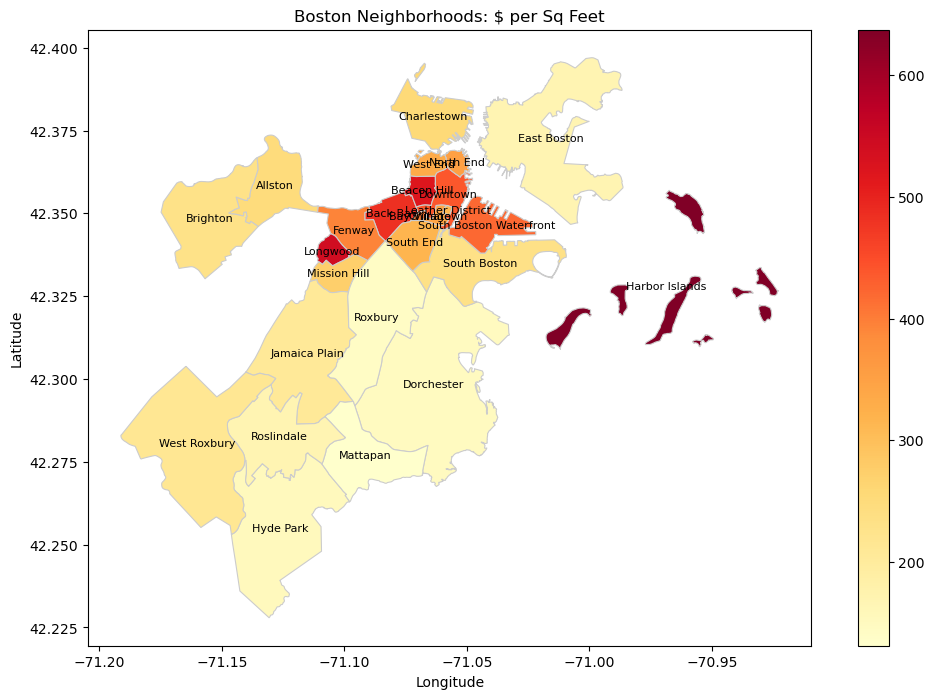

In [42]:
gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')

# Calculate the ratio of Total Value to Gross Area
gdf['Value_Area_Ratio'] = gdf['TOTAL_VALUE_mean'] / gdf['GROSS_AREA_mean']

# Plot the geographical heat map with neighborhood names
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(column='Value_Area_Ratio', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate each neighborhood with its name
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['neighborhood']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Customize the plot
ax.set_title('Boston Neighborhoods: $ per Sq Feet')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

/var/folders/ly/3ktmx9r518bgzqtk_9ptvvvc0000gn/T/ipykernel_40639/2661356800.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['neighborhood']):


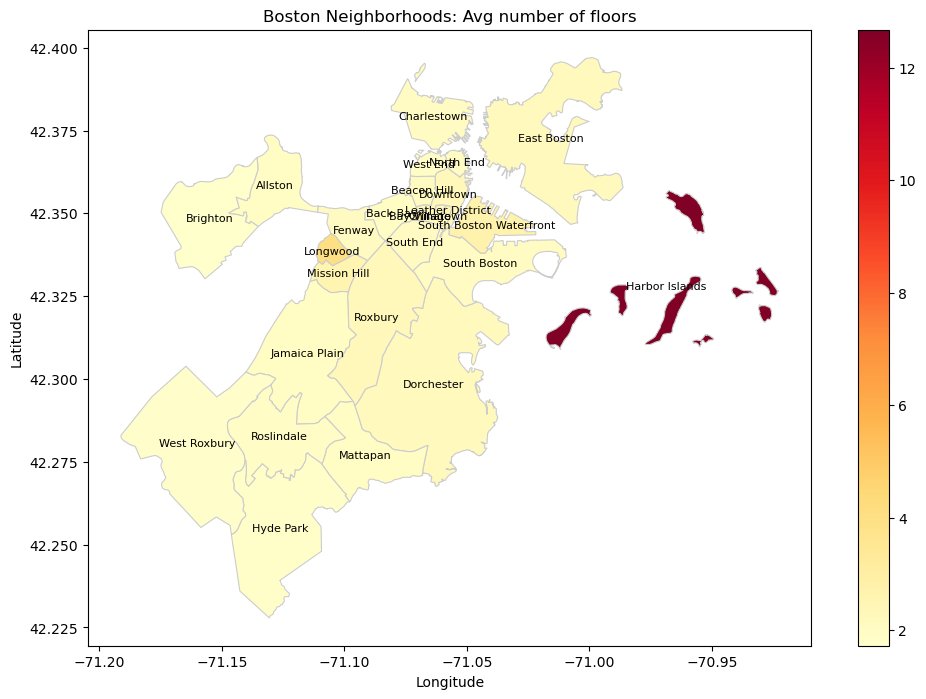

In [43]:
# Plot the geographical heat map with neighborhood names for RES_FLOOR_mean
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(column='RES_FLOOR_mean', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate each neighborhood with its name
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['neighborhood']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Customize the plot
ax.set_title('Boston Neighborhoods: Avg number of floors')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

/var/folders/ly/3ktmx9r518bgzqtk_9ptvvvc0000gn/T/ipykernel_40639/22355881.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['neighborhood']):


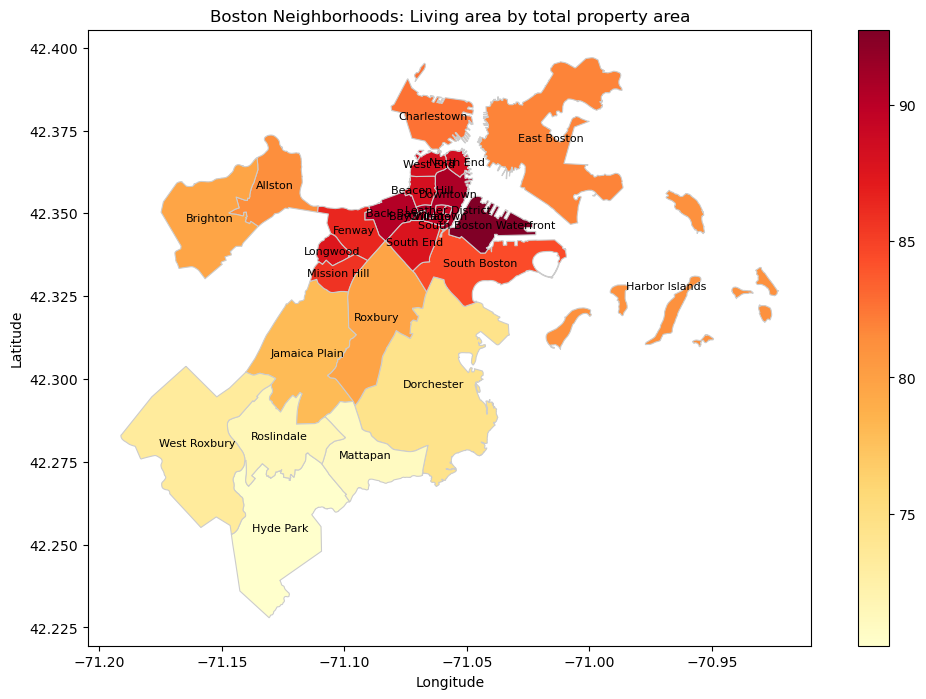

In [44]:
# Calculate the percentage of LIVING_AREA_mean by GROSS_AREA_mean
gdf['Living_Area_Percentage'] = (gdf['LIVING_AREA_mean'] / gdf['GROSS_AREA_mean']) * 100

# Plot the geographical heat map with neighborhood names for Living_Area_Percentage
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(column='Living_Area_Percentage', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate each neighborhood with its name
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['neighborhood']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Customize the plot
ax.set_title('Boston Neighborhoods: Living area by total property area')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

/var/folders/ly/3ktmx9r518bgzqtk_9ptvvvc0000gn/T/ipykernel_40639/1754382063.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['neighborhood']):


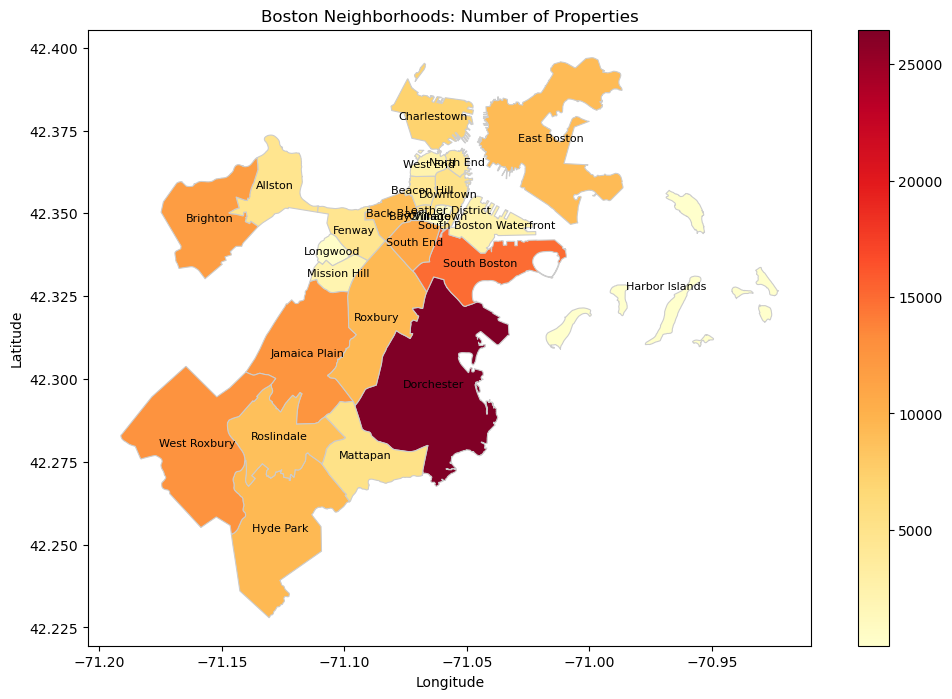

In [45]:
# Plot the geographical heat map with neighborhood names for Observation_Count
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(column='Observation_Count', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate each neighborhood with its name
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['neighborhood']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Customize the plot
ax.set_title('Boston Neighborhoods: Number of Properties')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()